[Probability and Statistics for Data Science](https://www.ps4ds.net/) 

Code for Examples 11.26 and 11.29

Principal component analysis of face images\
Topics: Principal component analysis, dimensionality reduction, mean of a vector 

Author: Carlos Fernandez-Granda

In [1]:
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['text.usetex'] = True
np.set_printoptions(precision=2)

font_size = 15
font_size_legend = 15
font_size_ticks = 15
font_size_graph = 15

In [2]:
data = fetch_olivetti_faces()
identities = data.target
faces = data.images.reshape((len(data.images), -1))
image_shape=(64,64)

(400, 4096)


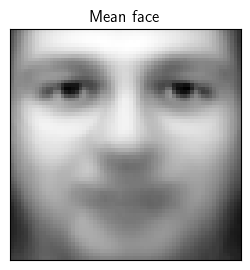

In [21]:
mean_face = np.mean(faces, axis=0)

plt.figure(figsize=(3,3))
plt.imshow(mean_face.reshape(image_shape), cmap=plt.cm.gray, 
               interpolation='nearest',
               vmin=mean_face.min(), vmax=mean_face.max())
plt.xticks(())
plt.yticks(())
plt.title("Mean face");

In [6]:
# Principal component analysis
sample_covariance_matrix = np.cov(faces.T)
eigvals,U = np.linalg.eig(sample_covariance_matrix)
U = np.real(U) # Principal directions

/Users/carlos/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/carlos/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/var/folders/1r/8drxnfc95_q25t4qy8ng2md80000gn/T/ipykernel_98606/3617868844.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.title("Principal direction: " + str(ind+1) + "\n Variance " + str(round(float(eigvals[ind]),3)))
/var/folders/1r/8drxnfc95_q25t4qy8ng2md80000gn/T/ipykernel_98606/3617868844.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matpl

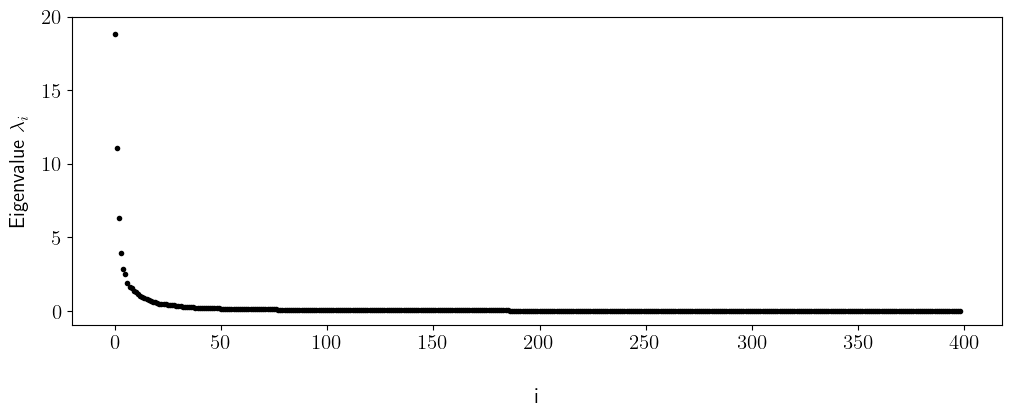

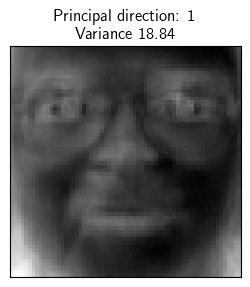

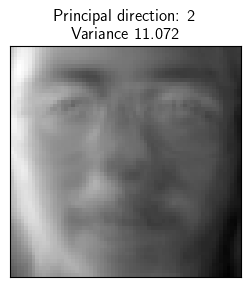

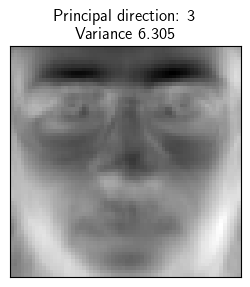

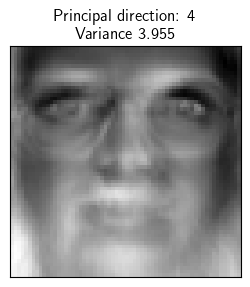

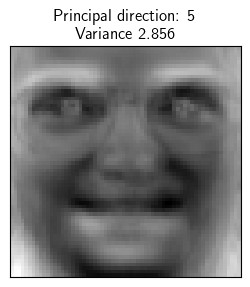

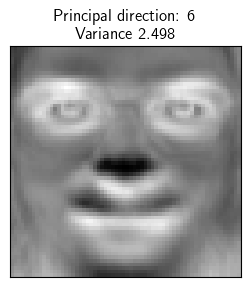

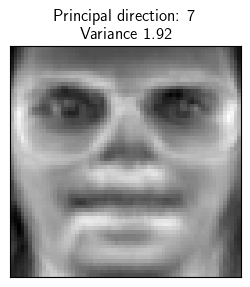

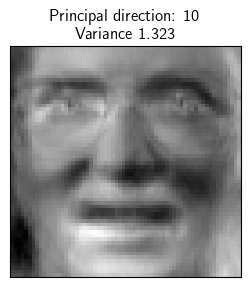

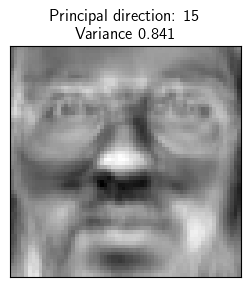

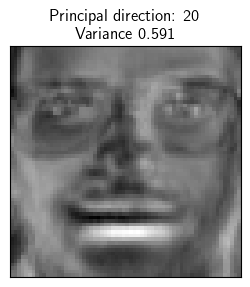

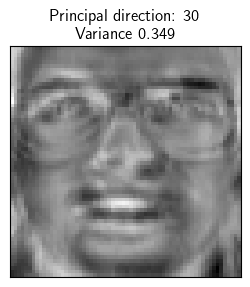

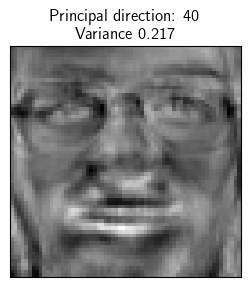

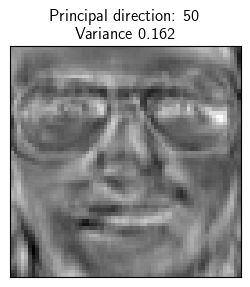

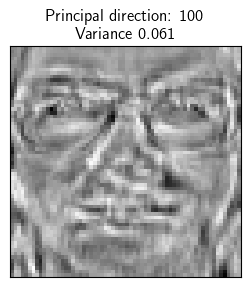

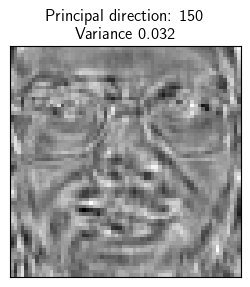

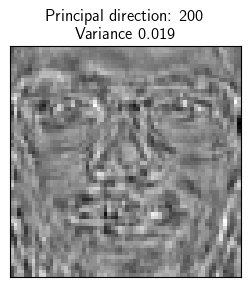

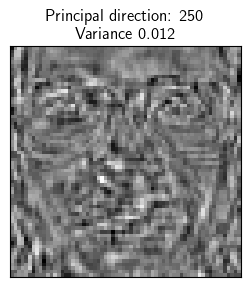

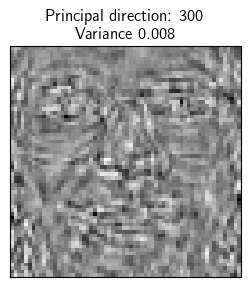

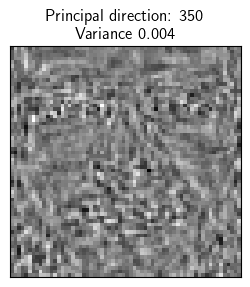

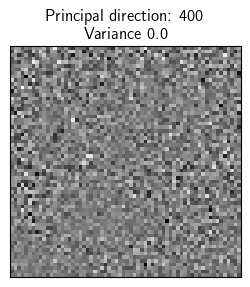

In [15]:
fig = plt.figure(figsize = (12,4)) 
plt.plot(eigvals[:399], markersize=2, color="white",  marker='o', markeredgewidth=2,
            linestyle = 'None',markeredgecolor="black")
plt.xticks(fontsize=font_size_ticks) 
plt.yticks([0,5,10,15,20],fontsize=font_size_ticks)
plt.xlabel(r"i", fontsize=font_size,labelpad=25)
plt.ylabel(r"Eigenvalue $\lambda_i$", fontsize=font_size,labelpad=10)

inds = [0,1,2,3,4,5,6,9,14,19,29,39,49,99,149,199,249,299,349,399]

for ind in inds:
    pd = U[:,ind]
    plt.figure(figsize=(3,3))
    plt.imshow(pd.reshape(image_shape), cmap=plt.cm.gray, #cmap=plt.cm.gray_r,
                   interpolation='nearest',
                   vmin=pd.min(), vmax=pd.max())
    plt.xticks(())
    plt.yticks(())
    plt.title("Principal direction: " + str(ind+1) + "\n Variance " + str(round(float(eigvals[ind]),3)))

Component 0 = -1.89
Component 1 = 0.92
Component 2 = -1.08
Component 3 = -1.52
Component 4 = -0.73
Component 5 = -1.49
Component 6 = -1.19


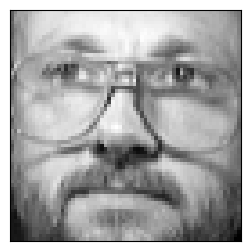

In [14]:
selected_ind = 133
face = faces[selected_ind,:]

plt.figure(figsize=(3,3))
plt.imshow(face.reshape(image_shape), cmap=plt.cm.gray, #cmap=plt.cm.gray_r,
               interpolation='nearest',
               vmin=face.min(), vmax=face.max())
plt.xticks(())
plt.yticks(())

centered_face = face - mean_face

k = 7 

for ind in range(k):
    pd = U[:,ind]
    print("Component " + str(ind) + " = " + str(round(centered_face @ pd,2)))

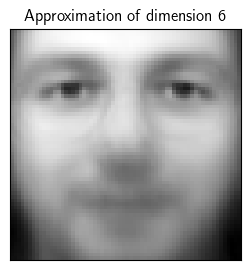

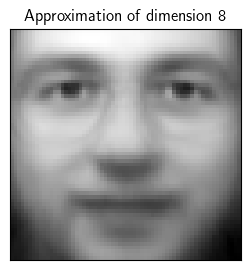

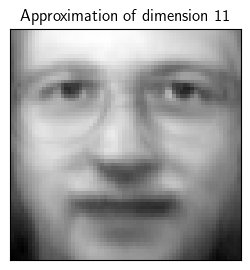

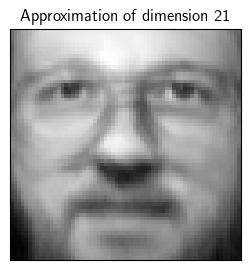

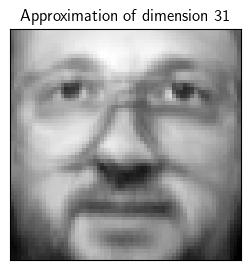

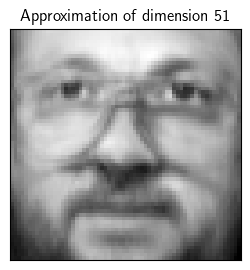

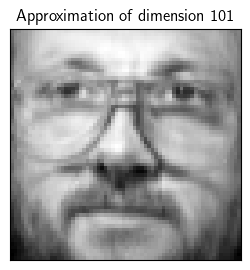

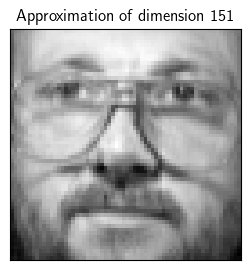

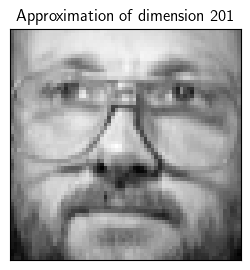

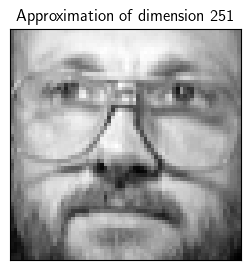

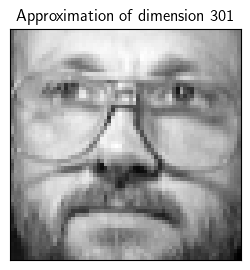

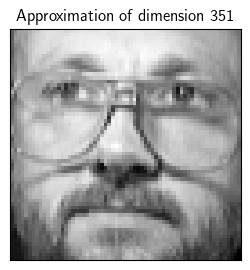

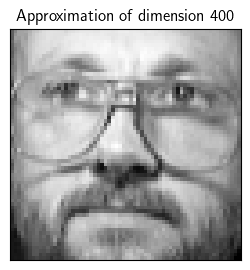

In [22]:
k_vals = [5,7,10,20,30,50,100,150,200,250,300,350,399]

for k in k_vals:
    
    approximation = mean_face + centered_face @ U[:,:k] @ U[:,:k].T
    
    plt.figure(figsize=(3,3))
    plt.imshow(approximation.reshape(image_shape), cmap=plt.cm.gray, #cmap=plt.cm.gray_r,
                   interpolation='nearest',
                   vmin=approximation.min(), vmax=approximation.max())
    plt.xticks(())
    plt.yticks(())
    plt.title("Approximation of dimension " + str(k+1));